In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'D:\anaconda\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\aaish\\AppData\\Local\\Temp\\pip-install-qi80wxyu\\tensorflow-gpu_89dfbf69d2c34bf6854eb19738420177\\setup.py'"'"'; __file__='"'"'C:\\Users\\aaish\\AppData\\Local\\Temp\\pip-install-qi80wxyu\\tensorflow-gpu_89dfbf69d2c34bf6854eb19738420177\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\aaish\AppData\Local\Temp\pip-wheel-n7qfepdj'
       cwd: C:\Users\aaish\AppData\Local\Temp\pip-install-qi80wxyu\tensorflow-gpu_89dfbf69d2c34bf6854eb19738420177\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\aaish\App

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
abstract_singleton            1.0.1
aiohttp                       3.8.4
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.2
asynctest                     0.13.0
atomicwrites                  1.4.0
attrs                         21.4.0
auto_gpt_plugin_template      0.0.3
autoflake                     1.7.8
Automat                       20.2.0
autop

In [3]:
import tensorflow as tf

#Check the version of TensorFlow you are using
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2.13.0
[]


In [4]:
import tensorflow as tf
import os

In [5]:
gpus=tf.config.experimental.list_physical_devices('CPU')

In [6]:
#Avoid oom (OutOfMemoryError)errors by setting up GPU memory consumption
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

Remove Dodgy Image

In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [8]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [9]:
data_dir='data'

In [10]:
os.listdir(data_dir)

['happy', 'sad']

In [11]:
image_exts=['jpeg','jpg','bmp','png']

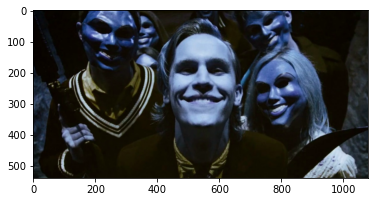

In [12]:
img=cv2.imread(os.path.join('data','happy','07-120104-happy_people_are_not_nice_people.jpg'))
img.shape
plt.imshow(img)

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path=os.path.join(data_dir, image_class, image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path)) 
            

Load Data

In [14]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [15]:
pip install keras

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
#building data pipeline
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [18]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
#ALLOWING ACCESS TO DATA PIPELINES
data_iterator= data.as_numpy_iterator()

In [20]:
data_iterator

In [21]:
#Accessing the data pipelne and get another batch from the iterator
batch= data_iterator.next()

In [22]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [23]:
#Class = 0 Happy people
#class=1 Sad people
batch[1]

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

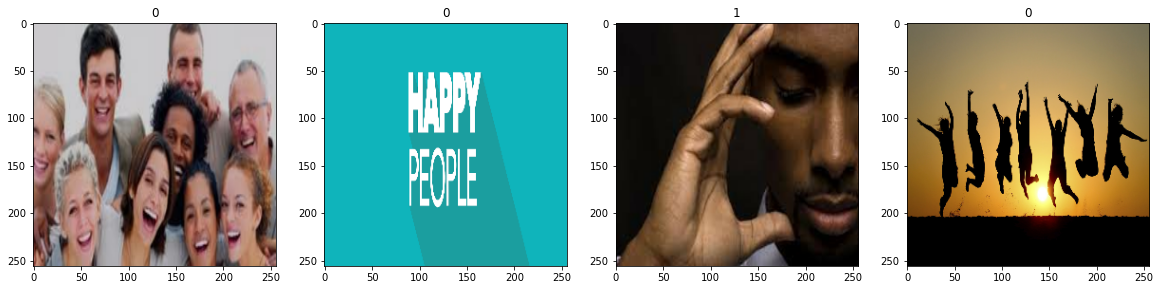

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [25]:
scaled=batch[0]/25

In [26]:
scaled.max()

10.2

Preprocess Data

In [27]:
#scale data
data=data.map(lambda x,y:(x/255,y))


In [28]:
data.as_numpy_iterator().next()[0].max()

1.0

Split Data

In [29]:
len(data)

10

In [30]:
train_size=int(len(data)*.7)
val_size= int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [31]:
train_size

7

In [32]:
val_size

3

In [33]:
train_size + val_size + test_size

12

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [35]:
len(test)

0

Build Deep modeling Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [37]:
model=Sequential()

In [38]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Train

In [41]:
logdir='logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist=model.fit(train,epochs=20,validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 6s 624ms/step - loss: 0.8358 - accuracy: 0.5536 - val_loss: 0.5944 - val_accuracy: 0.7037
Epoch 2/20
7/7 [==============================] - 5s 577ms/step - loss: 0.5747 - accuracy: 0.7366 - val_loss: 0.5671 - val_accuracy: 0.7531
Epoch 3/20
7/7 [==============================] - 5s 584ms/step - loss: 0.5109 - accuracy: 0.7812 - val_loss: 0.4290 - val_accuracy: 0.8765
Epoch 4/20
7/7 [==============================] - 5s 588ms/step - loss: 0.4415 - accuracy: 0.7902 - val_loss: 0.3847 - val_accuracy: 0.9012
Epoch 5/20
7/7 [==============================] - 5s 583ms/step - loss: 0.3719 - accuracy: 0.8839 - val_loss: 0.2134 - val_accuracy: 0.9630
Epoch 6/20
7/7 [==============================] - 5s 588ms/step - loss: 0.2898 - accuracy: 0.8884 - val_loss: 0.2274 - val_accuracy: 0.9259
Epoch 7/20
7/7 [==============================] - 5s 588ms/step - loss: 0.2033 - accuracy: 0.9330 - val_loss: 0.1461 - val_accuracy: 0.9506
Epoch 8/20
7/7 [====

In [44]:
hist.history

{'loss': [0.8358275294303894,
  0.5747407674789429,
  0.510917603969574,
  0.4414982497692108,
  0.3719269931316376,
  0.28981679677963257,
  0.2033190280199051,
  0.13720948994159698,
  0.13098052144050598,
  0.07605963200330734,
  0.07321513444185257,
  0.03805732727050781,
  0.034843433648347855,
  0.015559861436486244,
  0.01260471623390913,
  0.01609324850142002,
  0.015309986658394337,
  0.02027893252670765,
  0.021327879279851913,
  0.025437962263822556],
 'accuracy': [0.5535714030265808,
  0.7366071343421936,
  0.78125,
  0.7901785969734192,
  0.8839285969734192,
  0.8883928656578064,
  0.9330357313156128,
  0.9464285969734192,
  0.9598214030265808,
  0.9821428656578064,
  0.9866071343421936,
  0.9955357313156128,
  0.9866071343421936,
  0.9955357313156128,
  1.0,
  0.9910714030265808,
  0.9955357313156128,
  0.9910714030265808,
  0.9955357313156128,
  0.9866071343421936],
 'val_loss': [0.5944417715072632,
  0.5670831799507141,
  0.429029256105423,
  0.384683221578598,
  0.2134

Plot performance 

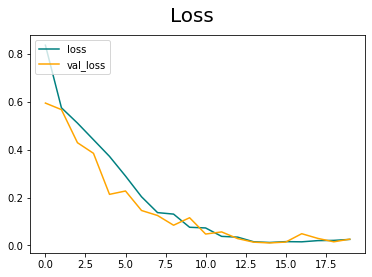

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

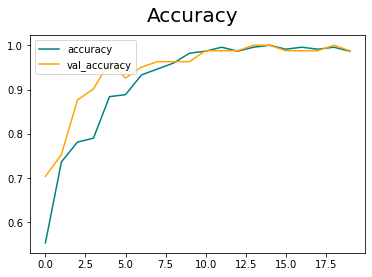

In [46]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show() 

Evaluate performance

In [47]:
#Evaluate Start frm Evaluation again
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [49]:
len(test)

0

In [50]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [53]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy}')

Precision:0.0, Recall:0.0, Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.0>>


Test

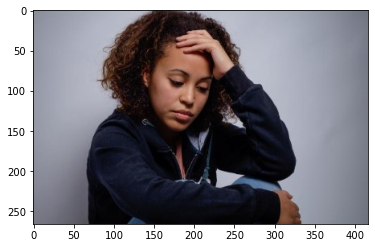

In [63]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

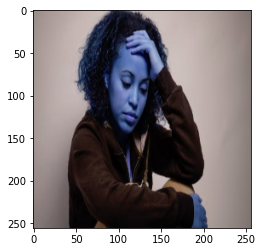

In [64]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[151.32785 , 139.32785 , 135.32785 ],
        [152.96179 , 140.96179 , 136.96179 ],
        [154.      , 142.      , 138.      ],
        ...,
        [129.99164 , 117.991646, 113.991646],
        [129.      , 117.      , 113.      ],
        [127.62891 , 115.62891 , 111.62891 ]],

       [[152.01843 , 140.01843 , 136.01843 ],
        [153.89005 , 141.89005 , 137.89005 ],
        [154.      , 142.      , 138.      ],
        ...,
        [129.57227 , 117.572266, 113.572266],
        [128.99667 , 116.99668 , 112.99668 ],
        [127.61048 , 115.61048 , 111.61048 ]],

       [[152.31445 , 140.31445 , 136.31445 ],
        [153.94336 , 141.94336 , 137.94336 ],
        [154.      , 142.      , 138.      ],
        ...,
        [129.61404 , 117.61404 , 113.61404 ],
        [128.94888 , 116.94889 , 112.94889 ],
        [127.41211 , 115.41211 , 111.41211 ]],

       ...,

       [[130.38141 , 118.3814  , 118.3814  ],
        [131.

In [66]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [67]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 72ms/step


In [70]:
yhat

array([[0.99999636]], dtype=float32)

In [71]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [72]:
yhat

array([[0.99999636]], dtype=float32)

save the model

In [73]:
from tensorflow.keras.models import load_model

In [75]:
model.save(os.path.join('models','happysadmodel.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')